## Hypothesis Testing Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

### Business Problem 1

In [5]:
LoansData=pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Basic Statistics  Case Study 5 - Hypothesis Testing\LoansData.csv")
LoansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [6]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

#### Reanming variables as per INC

In [7]:
LoansData.columns=LoansData.columns.str.replace('.','_')

C:\Users\kroop\AppData\Local\Temp\ipykernel_22280\4201275303.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  LoansData.columns=LoansData.columns.str.replace('.','_')


In [10]:
LoansData.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [17]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   float64
 3   Loan_Length                     2500 non-null   int32  
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [19]:
LoansData.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount_Requested,2499.0,12405.462185,7802.933666,1000.00,6000.00,10000.00,17000.000,35000.00
Amount_Funded_By_Investors,2499.0,12002.374186,7746.767348,-0.01,6000.00,10000.00,16000.000,35000.00
Interest_Rate,2498.0,13.065388,4.177201,5.42,10.16,13.11,15.800,24.89
Loan_Length,2500.0,41.260800,9.930893,36.00,36.00,36.00,36.000,60.00
Debt_To_Income_Ratio,2499.0,15.380420,7.505052,0.00,9.75,15.32,20.675,34.91
Monthly_Income,2499.0,5688.931321,3963.118185,588.50,3500.00,5000.00,6800.000,102750.00
Open_CREDIT_Lines,2497.0,10.072887,4.507416,2.00,7.00,9.00,13.000,38.00
Revolving_CREDIT_Balance,2497.0,15223.184622,18281.015258,0.00,5584.00,10948.00,18861.000,270800.00
Inquiries_in_the_Last_6_Months,2497.0,0.906688,1.231149,0.00,0.00,0.00,1.000,9.00


In [21]:
LoansData.isna().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

#### Dropping Employment length variable as it has many missing values

In [22]:
LoansData.drop(columns=['Employment_Length'],inplace=True)

In [23]:
LoansData.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0
2,35000.0,35000.0,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0
3,10000.0,9975.0,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0
4,12000.0,12000.0,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0


#### Missing value Imputation

In [24]:
LoansData.Amount_Requested.fillna(LoansData.Amount_Requested.mean(), inplace= True)

In [26]:
LoansData.Amount_Funded_By_Investors.fillna(LoansData.Amount_Funded_By_Investors.mean(), inplace= True)

In [27]:
LoansData.Interest_Rate.fillna(LoansData.Interest_Rate.mean(), inplace= True)

In [28]:
LoansData.Debt_To_Income_Ratio.fillna(LoansData.Debt_To_Income_Ratio.mean(), inplace= True)

In [40]:
LoansData.Home_Ownership.fillna(LoansData.Home_Ownership.mode(), inplace=  True)

In [30]:
LoansData.Monthly_Income.fillna(LoansData.Monthly_Income.mean(), inplace= True)

In [44]:
LoansData.FICO_Range.fillna(LoansData.FICO_Range.mode(), inplace= True)

In [33]:
LoansData.Open_CREDIT_Lines.fillna(LoansData.Open_CREDIT_Lines.mean(), inplace = True)

In [34]:
LoansData.Revolving_CREDIT_Balance.fillna(LoansData.Revolving_CREDIT_Balance.mean(), inplace= True)

In [42]:
LoansData.Inquiries_in_the_Last_6_Months.fillna(LoansData.Inquiries_in_the_Last_6_Months.mean(), inplace= True)

## Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)
### a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)


In [49]:
Corr=stats.pearsonr(LoansData['Interest_Rate'],LoansData['Amount_Requested'])
Corr

(0.3324464059665682, 1.4148683739824417e-65)

As New PValue is less than 0.05, we reject Null hypothesis. Hence, There is a relationship between Interest Rate and Loan Amount requested.

### b. Loan length is directly effecting interest rate.

In [52]:
LoansData.Loan_Length.value_counts()

36    1952
60     548
Name: Loan_Length, dtype: int64

In [56]:
Loan_Len36=LoansData['Interest_Rate'].loc[LoansData['Loan_Length']==36]
Loan_Len60=LoansData['Interest_Rate'].loc[LoansData['Loan_Length']==60]

In [57]:
Loan_Len36.mean()

12.127141791302005

In [58]:
Loan_Len60.mean()

16.40746350364961

### Perform the test

In [62]:
stats.ttest_ind(Loan_Len36,Loan_Len60)

Ttest_indResult(statistic=-23.41049023613487, pvalue=9.549596064332559e-110)

As New PValue is less than 0.05, we  reject Null hypothesis. Hence, Loan length is directly effecting interest rate

### c. Interest rate varies for different purpose of loans

In [66]:
LoansData.Loan_Purpose.value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [68]:
LoanPurpose=LoansData.groupby('Loan_Purpose')[['Interest_Rate']].mean()
LoanPurpose

,Interest_Rate
Loan_Purpose,
car,11.113000
credit_card,13.050688
debt_consolidation,13.586917
educational,11.007333
home_improvement,11.594276
house,13.448000
major_purchase,10.797822
medical,11.649667
moving,13.621034


In [82]:
LP1=LoansData.query('Loan_Purpose=="car"').Interest_Rate
LP2=LoansData.query('Loan_Purpose=="credit_card"').Interest_Rate
LP3=LoansData.query('Loan_Purpose=="debt_consolidation"').Interest_Rate
LP4=LoansData.query('Loan_Purpose=="educational"').Interest_Rate
LP5=LoansData.query('Loan_Purpose=="home_improvement"').Interest_Rate
LP6=LoansData.query('Loan_Purpose=="house"').Interest_Rate
LP7=LoansData.query('Loan_Purpose=="major_purchase"').Interest_Rate
LP8=LoansData.query('Loan_Purpose=="medical"').Interest_Rate
LP9=LoansData.query('Loan_Purpose=="moving"').Interest_Rate
LP10=LoansData.query('Loan_Purpose=="other"').Interest_Rate
LP11=LoansData.query('Loan_Purpose=="renewable_energy"').Interest_Rate
LP12=LoansData.query('Loan_Purpose=="small_business"').Interest_Rate
LP13=LoansData.query('Loan_Purpose=="vacation"').Interest_Rate
LP14=LoansData.query('Loan_Purpose=="wedding"').Interest_Rate

In [85]:
stats.f_oneway(LP1,LP2,LP3,LP4,LP5,LP6,LP7,LP8,LP9,LP10,LP11,LP12,LP13,LP14) 

F_onewayResult(statistic=7.482638784097435, pvalue=1.1599665535989115e-14)

As New PValue is less than 0.05, we  reject Null hypothesis. Hence, Interest Rates vary for different purposes of loans.

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [96]:
HFCT=pd.crosstab(LoansData.Home_Ownership,LoansData.FICO_Range)
HFCT

FICO_Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home_Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,67,79,55,61,...,21,12,15,7,7,6,5,6,0,1
NONE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,67,75,90,75,91,65,...,4,5,4,5,2,3,2,0,0,0


In [100]:
stats.chi2_contingency(HFCT)

(473.0524636834602,
 1.202159201024428e-35,
 148,
 array([[2.29475370e+00, 1.37685222e+00, 4.58950741e-01, 1.83580296e+00,
         5.73688426e+01, 6.65478574e+01, 7.84805767e+01, 7.61858230e+01,
         7.20552663e+01, 6.24173008e+01, 6.42531037e+01, 7.02194634e+01,
         6.01225471e+01, 6.14993993e+01, 5.09435322e+01, 4.26824189e+01,
         5.23203845e+01, 4.31413696e+01, 4.31413696e+01, 2.98317982e+01,
         2.43243893e+01, 2.47833400e+01, 2.79959952e+01, 2.11117341e+01,
         2.11117341e+01, 1.65222267e+01, 7.80216260e+00, 1.00969163e+01,
         1.28506207e+01, 8.72006408e+00, 9.17901482e+00, 5.96635963e+00,
         5.96635963e+00, 5.04845815e+00, 3.67160593e+00, 2.75370445e+00,
         4.58950741e-01, 4.58950741e-01],
        [2.00240288e-03, 1.20144173e-03, 4.00480577e-04, 1.60192231e-03,
         5.00600721e-02, 5.80696836e-02, 6.84821786e-02, 6.64797757e-02,
         6.28754505e-02, 5.44653584e-02, 5.60672807e-02, 6.12735282e-02,
         5.24629555e-02, 5.36643

As New PValue is less than 0.05, we reject Null hypothesis. Hence,  There is relationship between FICO scores and Home Ownership.

## BUSINESS PROBLEM - 2

### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.


In [102]:
PriceQuotes= pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Basic Statistics  Case Study 5 - Hypothesis Testing\Price_Quotes.csv")
PriceQuotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [106]:
PriceQuotes.Barry_Price.mean()

124.33333333333333

In [108]:
PriceQuotes.Mary_Price.mean()

114.75

In [118]:
stats.ttest_rel(PriceQuotes.Barry_Price,PriceQuotes.Mary_Price)

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

As New PValue is less than 0.05, we reject Null hypothesis. Hence, there is difference in the average price quotes provided by Mary abnd Barry.

## BUSINESS PROBLEM-3:

### BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Isthere evidence that the critical incidence rate improved?


In [119]:
TF= pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Basic Statistics  Case Study 5 - Hypothesis Testing\Treatment_Facility.csv")
TF

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [121]:
TF.rename(columns={'VAR4':'TRFFP','VAR5':'CIP'},inplace=True)
TF

,Month,Reengineer,Employee_Turnover,TRFFP,CIP
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [122]:
TF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   TRFFP              20 non-null     float64
 4   CIP                20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [130]:
Pre=  TF.loc[TF.Reengineer== 'Prior'].CIP
Post= TF.loc[TF.Reengineer== 'Post'].CIP

In [131]:
Pre

0      42.682927
1      25.806452
2     146.198830
3     110.429448
4      23.952096
5      47.058824
6       0.000000
7      25.000000
8     132.183908
9      16.574586
10     88.757396
11     31.746032
12     10.152284
Name: CIP, dtype: float64

In [132]:
Post

13    29.126214
14    21.008403
15    34.782609
16    19.900498
17     9.950249
18    25.531915
19    23.148148
Name: CIP, dtype: float64

### Perform the test

In [133]:
stats.ttest_ind(Pre, Post)

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

Since New PValue is higer than 0.05,we retain null hypothesis.  Hence, the reengineering effort has not changed the critical incidence rate

In [139]:
ET_Pre= TF.loc[TF.Reengineer== 'Prior'].Employee_Turnover
ET_Post= TF.loc[TF.Reengineer== 'Post'].Employee_Turnover

In [140]:
ET_Pre

0      0.0000
1      6.0606
2     12.1212
3      3.3333
4     12.9032
5      9.6774
6     11.7647
7     11.4286
8     23.0769
9     15.0000
10    10.0000
11    26.0870
12    11.1111
Name: Employee_Turnover, dtype: float64

In [153]:
ET_Post

13    26.6667
14    17.9487
15    12.8205
16    15.7895
17     0.0000
18    30.7692
19    26.8293
Name: Employee_Turnover, dtype: float64

### Perform the test

In [151]:
stats.ttest_ind(ET_Pre,ET_Post)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

Since New PValue is higer than 0.05,we retain null hypothesis. Hence, the reengineering effort has not changed the staff turnover rate

## BUSINESS PROBLEM-4

### BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

In [157]:
Priority_Assessment= pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Basic Statistics  Case Study 5 - Hypothesis Testing\Priority_Assessment.csv")
Priority_Assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [145]:
Priority_Assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [167]:
High=Priority_Assessment.loc[Priority_Assessment.Priority=='High'].Days
Medium=Priority_Assessment.loc[Priority_Assessment.Priority=='Medium'].Days
Low=Priority_Assessment.loc[Priority_Assessment.Priority=='Low'].Days

In [168]:
High

0      3.3
2      0.3
5      0.3
6      0.3
7      0.3
      ... 
631    0.3
632    1.0
635    0.1
638    0.3
641    0.5
Name: Days, Length: 326, dtype: float64

In [169]:
Medium

1       7.9
3       0.7
4       8.6
9      15.9
11      0.3
       ... 
633     2.0
634     2.5
636     0.1
639     0.3
640     1.3
Name: Days, Length: 249, dtype: float64

In [170]:
Low

14     23.2
15      5.3
20      4.6
23      1.8
26     17.0
       ... 
609     0.5
613     7.9
620     0.3
622     0.1
637     2.5
Name: Days, Length: 67, dtype: float64

### Perform the test

In [180]:
stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

Since New PValue is higer than 0.05,we retain null hypothesis. Hence, the Prioritization system is not working

## BUSINESS PROBLEM-5

In [181]:
Films= pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Basic Statistics  Case Study 5 - Hypothesis Testing\Films.csv")
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [182]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [183]:
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [185]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [196]:
Films.Gender=np.where((Films.Gender=='Female')|(Films.Gender=='1'),'Female','Male')

In [198]:
Films.Gender.value_counts()

Female    213
Male      117
Name: Gender, dtype: int64

In [199]:
Films.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [200]:
Films.Marital_Status=np.where((Films.Marital_Status=='Married')|(Films.Marital_Status=='1'),'Married','Single')

In [201]:
Films.Marital_Status.value_counts()

Single     230
Married    100
Name: Marital_Status, dtype: int64

#### Missing Value Imputation

In [224]:
Films['Marital_Status'] =Films['Marital_Status'].fillna(Films['Marital_Status'].mode())
Films['Sinage'] = Films['Sinage'].fillna(Films['Sinage'].mode())
Films['Parking'] = Films['Parking'].fillna(Films['Parking'].mode())
Films['Clean'] = Films['Clean'].fillna(Films['Clean'].mode())
Films['Overall'] = Films['Overall'].fillna(Films['Overall'].mode())
Films['Age'] = Films['Age'].fillna(Films['Age'].mode())
Films['Income'] = Films['Income'].fillna(Films['Income'].mode())
Films['Hear_About'] = Films['Hear_About'].fillna(Films['Hear_About'].mode())

In [225]:
Films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

### BUSINESS PROBLEM: Use the survey resultsto addressthe following questions 
### 1 What is the overall level of customer satisfaction?


In [226]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


### 2  What factors are linked to satisfaction?

In [234]:
T1=pd.crosstab(Films.Sinage,Films.Overall)
T2=pd.crosstab(Films.Clean,Films.Overall)
T3=pd.crosstab(Films.Parking,Films.Overall)

In [230]:
T1

Overall,1.0,2.0,3.0,4.0,5.0
Sinage,,,,,
1.0,90,22,0,0,1
2.0,44,109,4,0,1
3.0,13,25,8,1,1
4.0,2,4,0,0,0
5.0,2,2,0,0,1


In [231]:
T2

Overall,1.0,2.0,3.0,4.0,5.0
Clean,,,,,
1.0,104,35,3,0,2
2.0,39,109,5,1,1
3.0,6,14,4,0,0
4.0,1,4,0,0,0
5.0,1,0,0,0,1


In [232]:
T3

Overall,1.0,2.0,3.0,4.0,5.0
Parking,,,,,
1.0,105,27,2,0,1
2.0,40,111,3,0,1
3.0,4,20,5,0,0
4.0,2,3,1,0,1
5.0,0,1,1,1,1


In [240]:
Chi1=stats.chi2_contingency(T1)
Chi1

(125.61859671027881,
 4.53298970003405e-19,
 16,
 array([[5.17060606e+01, 5.54727273e+01, 4.10909091e+00, 3.42424242e-01,
         1.36969697e+00],
        [7.22969697e+01, 7.75636364e+01, 5.74545455e+00, 4.78787879e-01,
         1.91515152e+00],
        [2.19636364e+01, 2.35636364e+01, 1.74545455e+00, 1.45454545e-01,
         5.81818182e-01],
        [2.74545455e+00, 2.94545455e+00, 2.18181818e-01, 1.81818182e-02,
         7.27272727e-02],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02]]))

In [242]:
Chi2=stats.chi2_contingency(T2)
Chi2

(127.71945555999517,
 1.7772535915434025e-19,
 16,
 array([[6.58909091e+01, 7.06909091e+01, 5.23636364e+00, 4.36363636e-01,
         1.74545455e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.09818182e+01, 1.17818182e+01, 8.72727273e-01, 7.27272727e-02,
         2.90909091e-01],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02],
        [9.15151515e-01, 9.81818182e-01, 7.27272727e-02, 6.06060606e-03,
         2.42424242e-02]]))

In [246]:
Chi3=stats.chi2_contingency(T3)
Chi3

(230.61691663391676,
 4.783162283608494e-40,
 16,
 array([[6.17727273e+01, 6.62727273e+01, 4.90909091e+00, 4.09090909e-01,
         1.63636364e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.32696970e+01, 1.42363636e+01, 1.05454545e+00, 8.78787879e-02,
         3.51515152e-01],
        [3.20303030e+00, 3.43636364e+00, 2.54545455e-01, 2.12121212e-02,
         8.48484848e-02],
        [1.83030303e+00, 1.96363636e+00, 1.45454545e-01, 1.21212121e-02,
         4.84848485e-02]]))

Since New PValues from last 3 X2 tests are less than 0.05, we reject null hypothesis. Hence, Signage, Cleanliness and Parking are linked to Overall Customer Satisfaction 

### What is the demographic profile of Film on the Rocks patrons?

In [249]:
Gender= Films.Gender.value_counts()
Gender

Female    213
Male      117
Name: Gender, dtype: int64

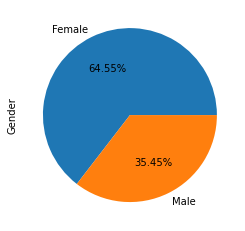

In [268]:
Gender.plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [259]:
MaritalStatus= Films.Marital_Status.value_counts()
MaritalStatus

Single     230
Married    100
Name: Marital_Status, dtype: int64

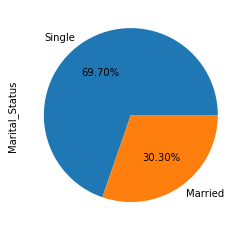

In [269]:
MaritalStatus.plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [263]:
Age= Films.Age.value_counts()
Age

2.0    177
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

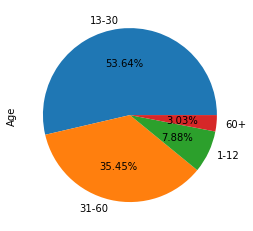

In [270]:
Age.plot(kind='pie',labels=['13-30','31-60','1-12','60+'],autopct='%1.2f%%')
plt.show()

### 4 In what media outlet(s) should the film series be advertised?

In [272]:
Channel=Films.Hear_About.value_counts()
Channel

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

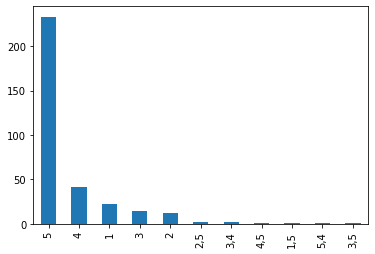

In [275]:
Channel.plot(kind='bar')
plt.show

Word of Mouth was the main channel through which people got to know about the film series, followed by website, television and radio.